# Crow Search Algorithm (CSA)
# Evolutionary Computation Project
# Author: Ghazza Ghorbel


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Sphere function: f(x) = sum(x_i^2)
def objective_function(x):
    return np.sum(x**2)


In [ ]:
def initialize_crows(n_crows, dimension, lower_bound, upper_bound):
    return np.random.uniform(lower_bound, upper_bound, (n_crows, dimension))


In [ ]:
def crow_search_algorithm(
        n_crows=30,
        dimension=2,
        lower_bound=-10,
        upper_bound=10,
        max_iter=100,
        awareness_probability=0.1,
        flight_length=2):

    positions = initialize_crows(n_crows, dimension, lower_bound, upper_bound)
    memory = np.copy(positions)
    memory_fitness = np.array([objective_function(mem) for mem in memory])

    best_fitness_history = []

    for t in range(max_iter):
        for i in range(n_crows):
            j = np.random.randint(n_crows)
            r = np.random.rand()

            if r > awareness_probability:
                new_position = positions[i] + flight_length * np.random.rand(dimension) * (memory[j] - positions[i])
            else:
                new_position = np.random.uniform(lower_bound, upper_bound, dimension)

            new_position = np.clip(new_position, lower_bound, upper_bound)
            new_fitness = objective_function(new_position)

            positions[i] = new_position

            if new_fitness < memory_fitness[i]:
                memory[i] = new_position
                memory_fitness[i] = new_fitness

        best_fitness_history.append(np.min(memory_fitness))

    best_index = np.argmin(memory_fitness)
    return memory[best_index], memory_fitness[best_index], best_fitness_history


In [ ]:
best_solution, best_fitness, history = crow_search_algorithm()

print("Best solution:", best_solution)
print("Best fitness:", best_fitness)


Best solution: [-6.07216359e-06  2.36937903e-05]
Best fitness: 5.982668688865047e-10


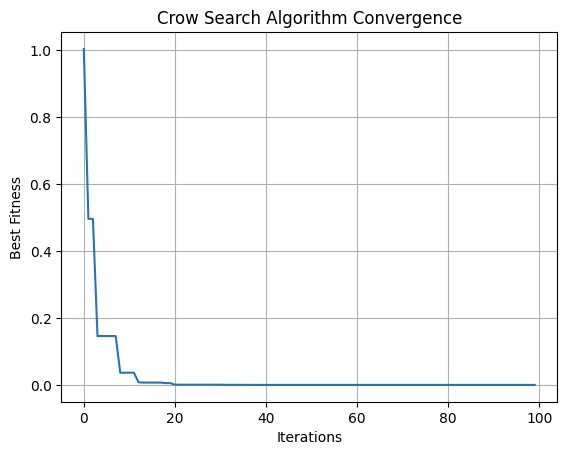

In [ ]:
plt.plot(history)
plt.xlabel("Iterations")
plt.ylabel("Best Fitness")
plt.title("Crow Search Algorithm Convergence")
plt.grid()
plt.show()
